### Feature analysis

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv("Datasets/df_with_predicted_values")

In [119]:
df = df.drop('Unnamed: 0',axis=1)

In [120]:
df

,id,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,HLOS,predicted
0,1,74,1,166.911029,80.265922,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,11.780422
1,2,61,0,154.900000,73.600000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,11.031273
2,3,58,0,166.911029,80.265922,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,10.750004
3,4,94,1,182.800000,66.200000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,13.655553
4,5,91,1,166.911029,80.265922,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,13.374283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,515,56,0,165.000000,72.600000,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,9.658150
502,516,74,0,166.911029,55.000000,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13,10.533804
503,517,81,1,158.000000,65.000000,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,12.728208
504,519,74,1,166.911029,81.700000,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9,11.496013


#### Analysis of the column hospital length of stay

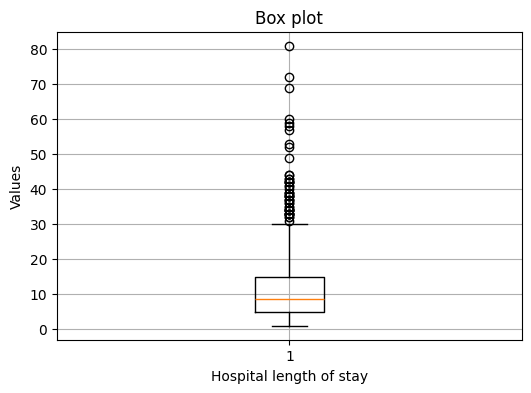

In [121]:
# Create a box plot
plt.figure(figsize=(6, 4))
plt.boxplot(df['HLOS'])
plt.title('Box plot')
plt.xlabel('Hospital length of stay')
plt.ylabel('Values')
plt.grid(True)
plt.show()

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


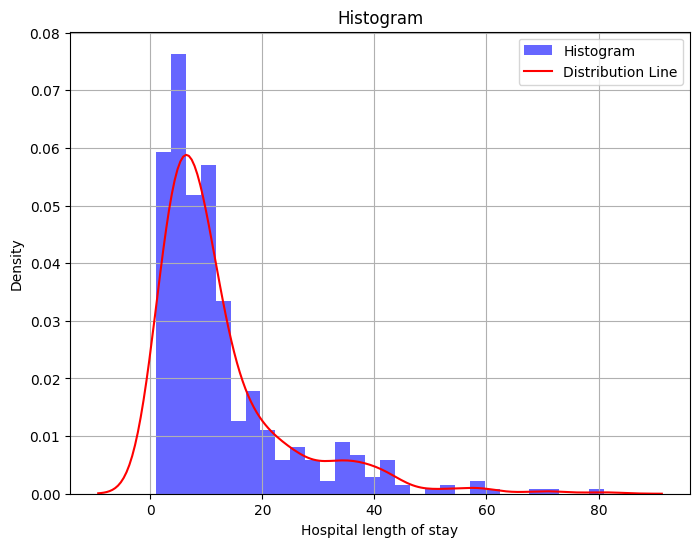

In [122]:
plt.figure(figsize=(8, 6))
plt.hist(df['HLOS'], bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
sns.kdeplot(df['HLOS'], color='red', label='Distribution Line')
plt.title('Histogram')
plt.xlabel('Hospital length of stay')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


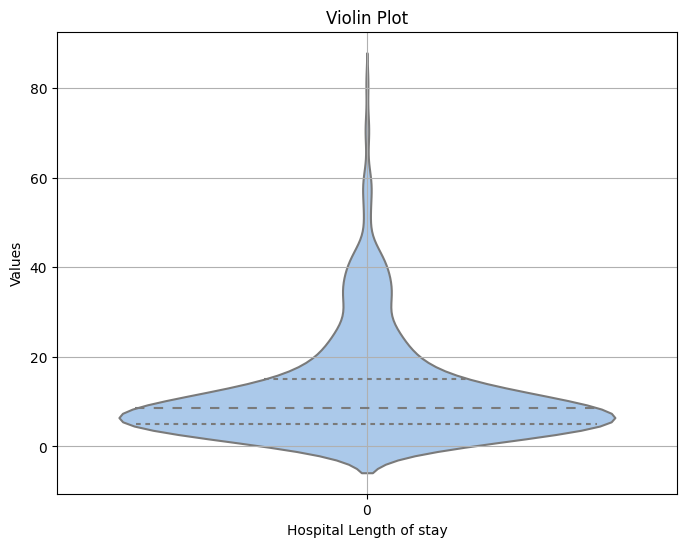

In [123]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df['HLOS'], inner="quartile", palette="pastel")
plt.title('Violin Plot')
plt.xlabel('Hospital Length of stay')
plt.ylabel('Values')
plt.grid(True)
plt.show()


In [124]:
from scipy.stats import skew,kurtosis

skewness_scipy = skew(df['HLOS'])
kurtosis_result = kurtosis(df['HLOS'])
print("Skewness:",skewness_scipy)
print("Kurtosis",kurtosis_result)

Skewness: 2.170202905971483
Kurtosis 5.718671441158483


### Filtering the dataset according to the 

In [125]:
df_20_30 = df[(df['HLOS'] > 20) & (df['HLOS'] < 30)]
df_30_40 = df[(df['HLOS'] >= 30) & (df['HLOS'] < 40)]
df_40_50 = df[(df['HLOS'] >= 40) & (df['HLOS'] < 50)]
df_50_60 = df[(df['HLOS'] >= 50) & (df['HLOS'] < 60)]
df_60_70 = df[(df['HLOS'] >= 60) & (df['HLOS'] < 70)]
df_70_80 = df[(df['HLOS'] >= 70) & (df['HLOS'] < 80)]

### Filtering out the columns if there are only 0 in the whole column

In [116]:
df_20_30 = df_20_30.loc[:, (df_20_30 != 0).any()]
df_30_40 = df_30_40.loc[:, (df_30_40 != 0).any()]
df_40_50 = df_40_50.loc[:, (df_40_50 != 0).any()]
df_50_60 = df_50_60.loc[:, (df_50_60 != 0).any()]
df_60_70 = df_60_70.loc[:, (df_60_70 != 0).any()]
df_70_80 = df_70_80.loc[:, (df_70_80 != 0).any()]

In [126]:
df_20_30.to_csv("Datasets/hospital_length_of_stay/20-30.csv")
df_30_40.to_csv("Datasets/hospital_length_of_stay/30-40.csv")
df_40_50.to_csv("Datasets/hospital_length_of_stay/40-50.csv")
df_50_60.to_csv("Datasets/hospital_length_of_stay/50-60.csv")
df_60_70.to_csv("Datasets/hospital_length_of_stay/60-70.csv")
df_70_80.to_csv("Datasets/hospital_length_of_stay/70-80.csv")

In [127]:
df_20_30

,id,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,HLOS,predicted
0,1,74,1,166.911029,80.265922,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,11.780422
9,10,66,0,145.000000,53.200000,1.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,11.500056
59,61,95,0,153.000000,65.500000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,20.555091
80,82,59,0,149.900000,60.000000,0.0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,18.033703
98,101,77,1,170.000000,61.400000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,15.801138
101,104,56,0,157.500000,56.700000,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,10.326426
102,105,93,0,166.911029,68.200000,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,17.734527
162,168,59,0,152.000000,67.000000,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,10.031797
182,189,56,1,168.000000,90.500000,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,10.102696
192,199,88,1,166.911029,59.000000,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,16.347363


In [128]:
df_30_40

,id,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,HLOS,predicted
5,6,44,1,177.000000,112.000000,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,14.097759
12,14,91,0,165.000000,74.000000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,24.100929
13,15,58,0,159.900000,38.600000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,21.749144
37,39,73,1,170.000000,77.000000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,12.214220
39,41,50,1,170.000000,77.100000,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,12.218553
48,50,66,1,162.000000,70.800000,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,12.970982
79,81,73,1,167.600000,66.200000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,11.402257
81,84,59,0,160.000000,95.600000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,11.338860
88,91,82,1,173.000000,82.000000,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,18.026793
93,96,83,0,159.000000,78.000000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,12.905383


In [129]:
df_40_50

,id,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,HLOS,predicted
46,48,59,1,160.000000,102.000000,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,10.089665
117,120,80,1,172.000000,61.200000,0.0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,12.634451
225,234,91,0,160.000000,67.300000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41,13.843969
235,245,94,0,165.100000,65.000000,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,15.277671
263,273,92,0,166.911029,51.600000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,16.799709
283,293,72,0,152.400000,70.400000,0.0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,18.713522
293,303,79,1,168.000000,87.100000,0.0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,13.058035
302,312,76,1,165.100000,68.000000,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41,11.591150
305,315,57,0,149.900000,61.200000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44,19.901426
307,317,62,1,166.911029,80.265922,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,11.268522


In [130]:
df_50_60

,id,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,HLOS,predicted
86,89,73,0,155.000000,50.9,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,15.072891
160,166,71,1,177.800000,86.2,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,11.214744
170,177,68,1,177.800000,113.4,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59,22.685580
248,258,60,0,166.911029,63.5,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,21.139852
355,367,90,1,179.100000,83.9,0.0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,13.185017


In [131]:
df_60_70

,id,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,HLOS,predicted
300,310,46,0,155.0,71.5,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,28.977304
338,350,59,1,152.4,70.4,1.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69,10.089665


In [132]:
len(df_60_70.columns)

748

In [102]:
df_70_80

,id,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,HLOS,predicted
23,25,64,1,159.0,97.0,1.0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,10.558448


In [103]:
len(df_70_80.columns)

748

In [104]:
print("20-30:",df_20_30['age'].mean())
print("30-40:",df_30_40['age'].mean())
print("40-50:",df_40_50['age'].mean())
print("50-60:",df_50_60['age'].mean())
print("60-70:",df_60_70['age'].mean())
print("70-80:",df_70_80['age'].mean())

20-30: 71.97297297297297
30-40: 70.20689655172414
40-50: 77.0
50-60: 72.4
60-70: 52.5
70-80: 64.0


In [105]:
print(df_20_30['sex'].value_counts())
print(df_30_40['sex'].value_counts())
print(df_40_50['sex'].value_counts())
print(df_50_60['sex'].value_counts())
print(df_60_70['sex'].value_counts())
print(df_70_80['sex'].value_counts())

sex
1    22
0    15
Name: count, dtype: int64
sex
1    18
0    11
Name: count, dtype: int64
sex
1    6
0    6
Name: count, dtype: int64
sex
1    3
0    2
Name: count, dtype: int64
sex
0    1
1    1
Name: count, dtype: int64
sex
1    1
Name: count, dtype: int64


In [106]:
print(df_20_30['smoking_history'].value_counts())
print(df_30_40['smoking_history'].value_counts())
print(df_40_50['smoking_history'].value_counts())
# print(df_50_60['smoking_history'].value_counts())
print(df_60_70['smoking_history'].value_counts())
print(df_70_80['smoking_history'].value_counts())

smoking_history
0.0    29
1.0     8
Name: count, dtype: int64
smoking_history
0.0    27
1.0     2
Name: count, dtype: int64
smoking_history
0.0    10
1.0     2
Name: count, dtype: int64
smoking_history
0.0    1
1.0    1
Name: count, dtype: int64
smoking_history
1.0    1
Name: count, dtype: int64
